In [1]:
import rasterio
from rasterio.plot import show,show_hist
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib import cm
import numpy as np
import matplotlib.transforms
import os

In [2]:
#get the variable initialized
%store -r 

## Helper Functions

In [142]:
def image_convert(data_numpy):
   
    # Converted the black background value to nan data
    image_data = np.where(data_numpy.any(0,keepdims=True),data_numpy,np.nan)
    image_data = rgb2gray(np.transpose(image_data, (1, 2, 0)))
    
    # Resampling the pixel values from -1 to 1
    image_data = ((image_data/255)*2)-1 
    return image_data

In [143]:
def map_legend(x,y):
    
    anchor = 1.5
    legend_items = []
    # Set the colours for the legend with the associated labels
    cmap_and_label = {'#fde725':'>1',
                      '#90d743':'>0.6 - dense vegetation',
                      '#35b779':'0.1 to 0.5 - sparse vegetation',
                      '#21918c':'-6 to 0.1 - bare soil',
                      '#31688e':'-1 to -0.6 - clouds and water',
                      '#443983':'<-1'
                     }
    # Loop over for the legend labels
    for cmap in cmap_and_label.keys():
        item = mpatches.Patch(color=cmap, label=cmap_and_label[cmap])
        legend_items.append(item)
    
    # Plot the legend with various styling parameters
    plt.legend(handles= legend_items,bbox_to_anchor = [2.5,1] ,loc=0, borderaxespad=0, fancybox = True, title='NDVI Classes', title_fontsize = 12)

In [144]:
def map_textbox(district,x,y,year):
    text_box = '\n'.join((
    r'District= %s' % (district, ),
    r'Spectral Indices= %s' % ('NDVI', ),
    r'Year= %s' % (year, )))
    
    x_loc = x + 750
    y_loc = y -300
    plt.text(x_loc, y_loc, text_box) 

In [145]:
def map_plot(year_season_ext,district,x,y,year):
    
    # Set a proper title to the map
    plt.title("NDVI Index -" + year_season_ext)
    # Select a colormap
    cmap = mpl.cm.viridis
    
    # We can also prepare our own custom colormap
    # cmap = colors.ListedColormap(['yellow', 'green','cyan', 'blue', 'violet', 'orange','red'])
    
    # Create discrete colorbar with custom intervals
    bounds = [-1,-0.6,0.1,0.5,1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
    
    # Create custom legend
    map_legend(x,y)
    
    # Create a text box for all the information
    map_textbox(district,x,y,year)

## Main Loop

In [146]:
parent_dir = "assets/images"

In [148]:
# data_tif_path = filepath + filename
# ds = rasterio.open(data_tif_path)

# # read as numpy array
# data_numpy = ds.read()
# conv_image = image_convert(data_numpy)

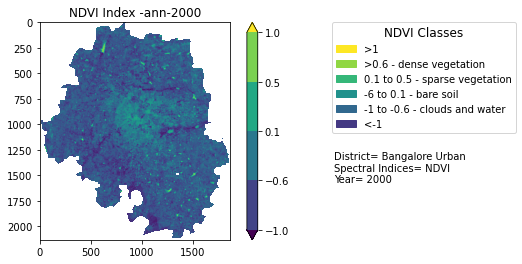

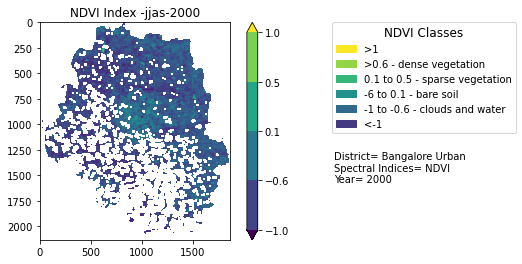

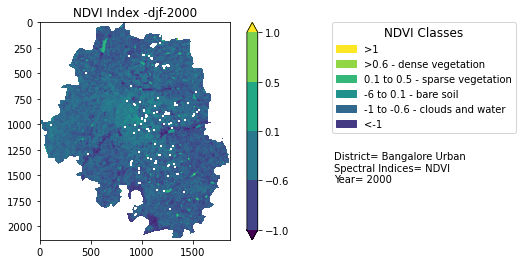

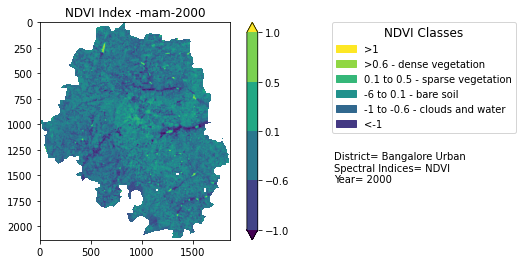

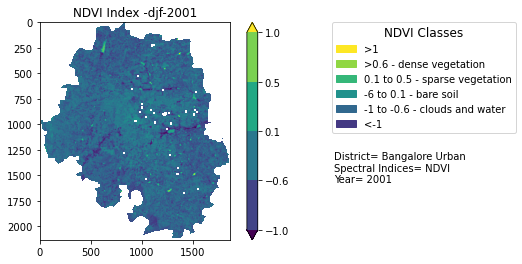

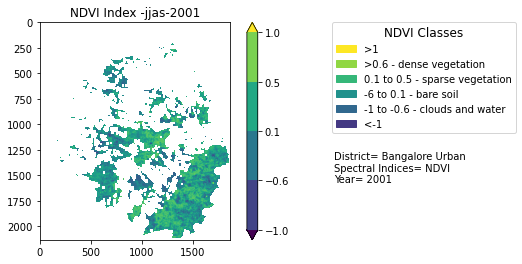

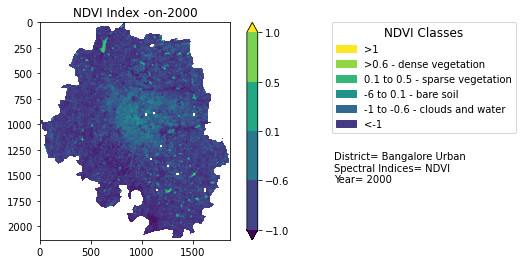

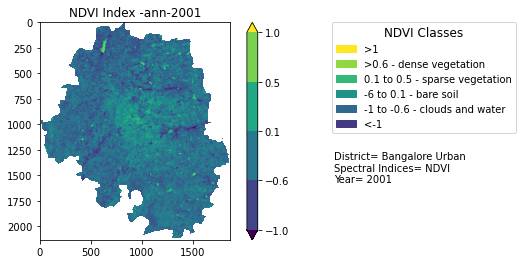

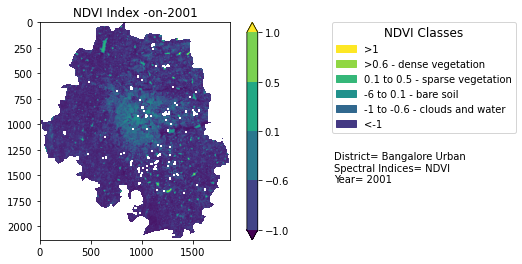

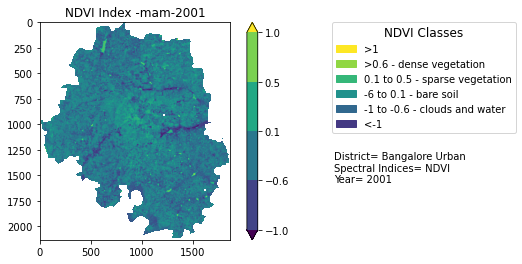

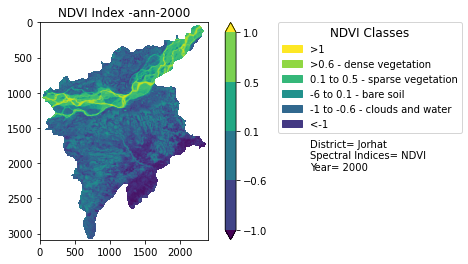

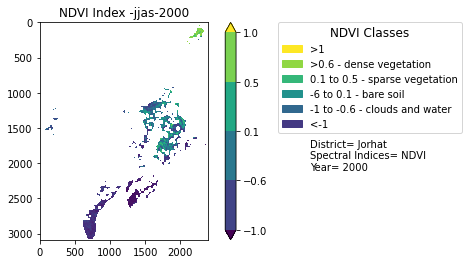

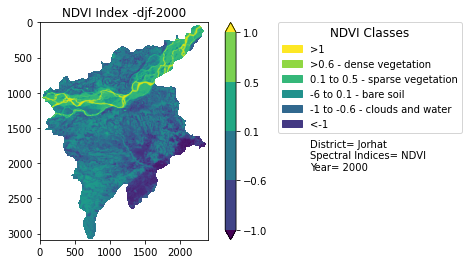

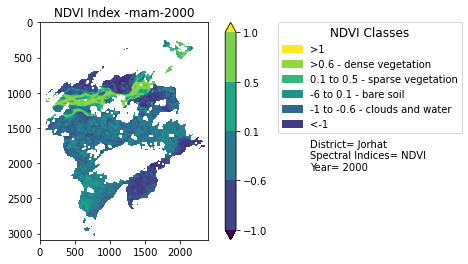

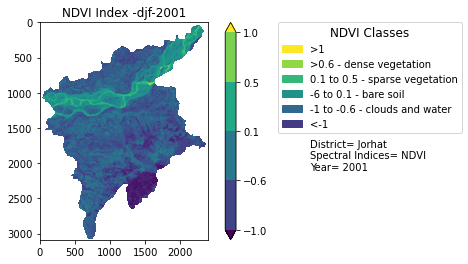

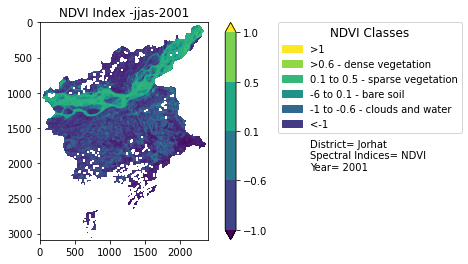

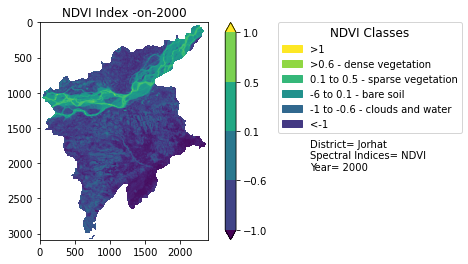

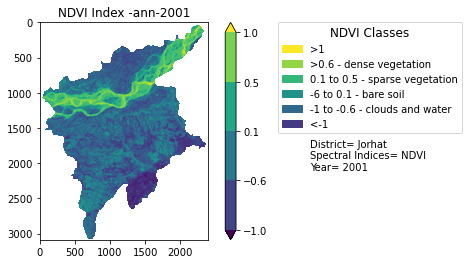

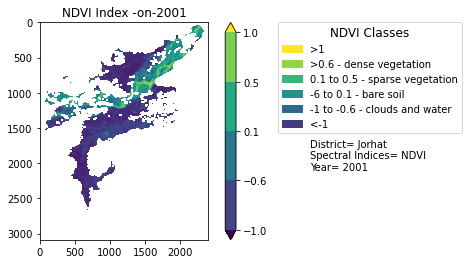

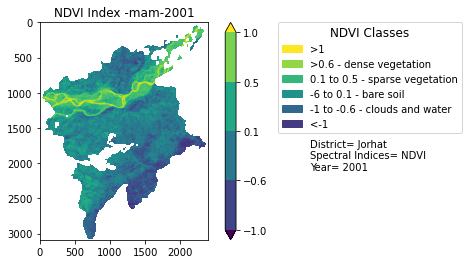

In [149]:
for district in districts:
    filepath = os.path.join(parent_dir + '/' + spectral_index+'-'+district + '/')
    for filename in os.listdir(filepath):
        
        data_tif_path = filepath + filename
        ds = rasterio.open(data_tif_path)
        
        # read as numpy array
        data_numpy = ds.read()
        conv_image = image_convert(data_numpy)
        x = conv_image.shape[0]
        y = conv_image.shape[1]

        year_season_ext = os.path.splitext(filename)[0]
        year = year_season_ext[-4:]
#         print(year_season_ext)
#         print(district)
        plt.figure()
        
        map_plot(year_season_ext,district,x,y,year)
        filename = district + "-" + year_season_ext + '.jpg'
# #         print(filename)
# # #         # Show the map
        
        plt.imshow(conv_image)
# # #         print(count)
# #         #Save the map
#         plt.savefig(filename,format = "jpg", dpi = 150, bbox_inches ="tight")
# # #         count = count+1
        